In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
matplotlib.style.use('fivethirtyeight')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
dfRed = pd.read_csv("winequality-red.csv", sep=";")
dfWhite = pd.read_csv("winequality-white.csv", sep=";")

In [ ]:
dfRed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
dfWhite.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
# Pooling the data
dfRed["color"] = "red"
dfWhite["color"] = "white"
dfPooled = pd.concat([dfRed, dfWhite], ignore_index=True)
dfPooled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


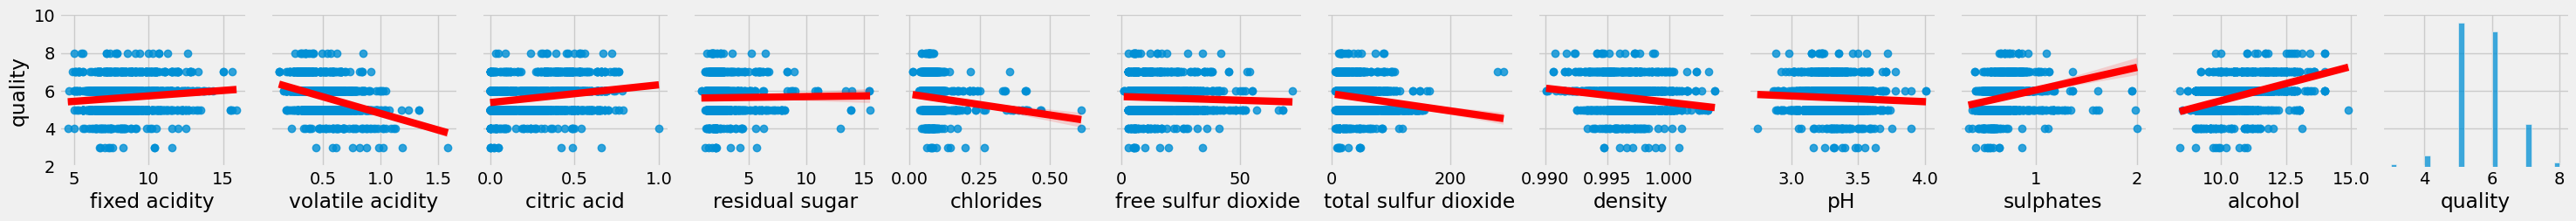

In [ ]:
# Pair plots for red
red_pairplot = sns.pairplot(dfRed, y_vars ="quality", kind = "reg", plot_kws={'line_kws':{'color':'red'}})
red_pairplot.set(ylim=(2, 10))
plt.show()

red_pairplot.savefig('red_pairplot.png')


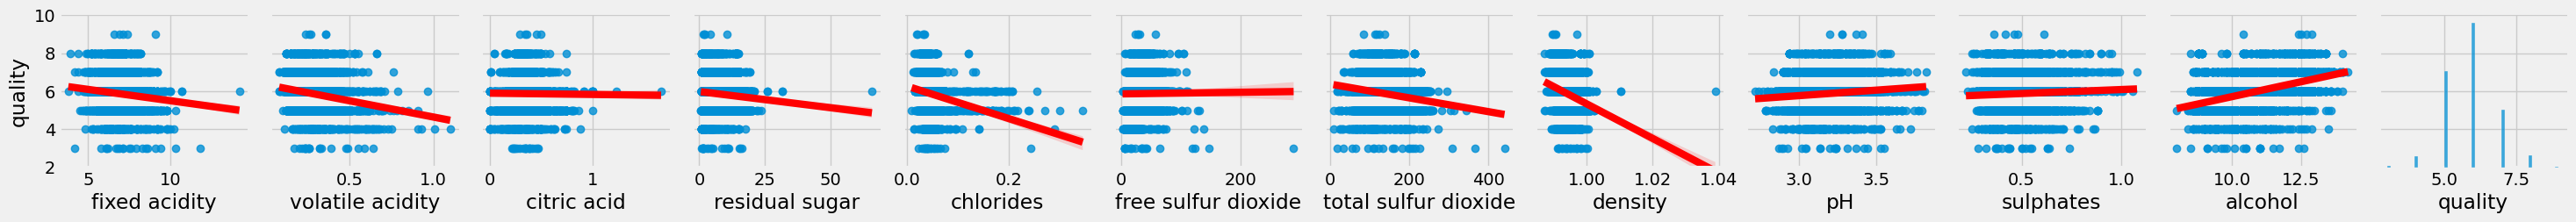

In [ ]:
# Pair plots for white
white_pairplot = sns.pairplot(dfWhite, y_vars = "quality", kind = "reg", plot_kws={'line_kws':{'color':'red'}})
white_pairplot.set(ylim=(2,10))
plt.show()

white_pairplot.savefig('white_pairplot.png')

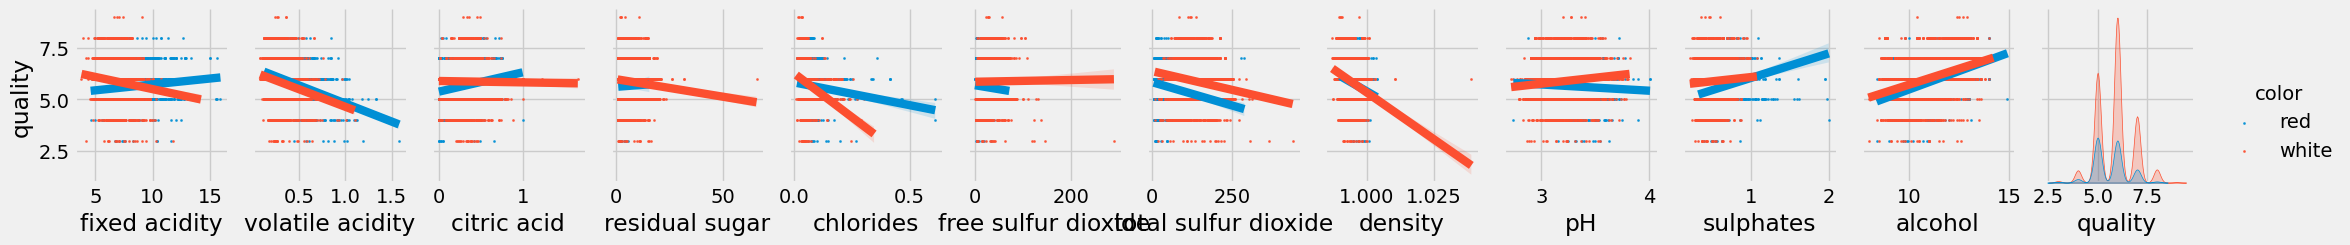

In [ ]:
# Create interaction plot
sns.pairplot(dfPooled, aspect=.75, hue="color", y_vars = "quality", kind="reg", plot_kws=dict(scatter_kws=dict(s=1)))
plt.savefig("interaction_plot")
plt.show()

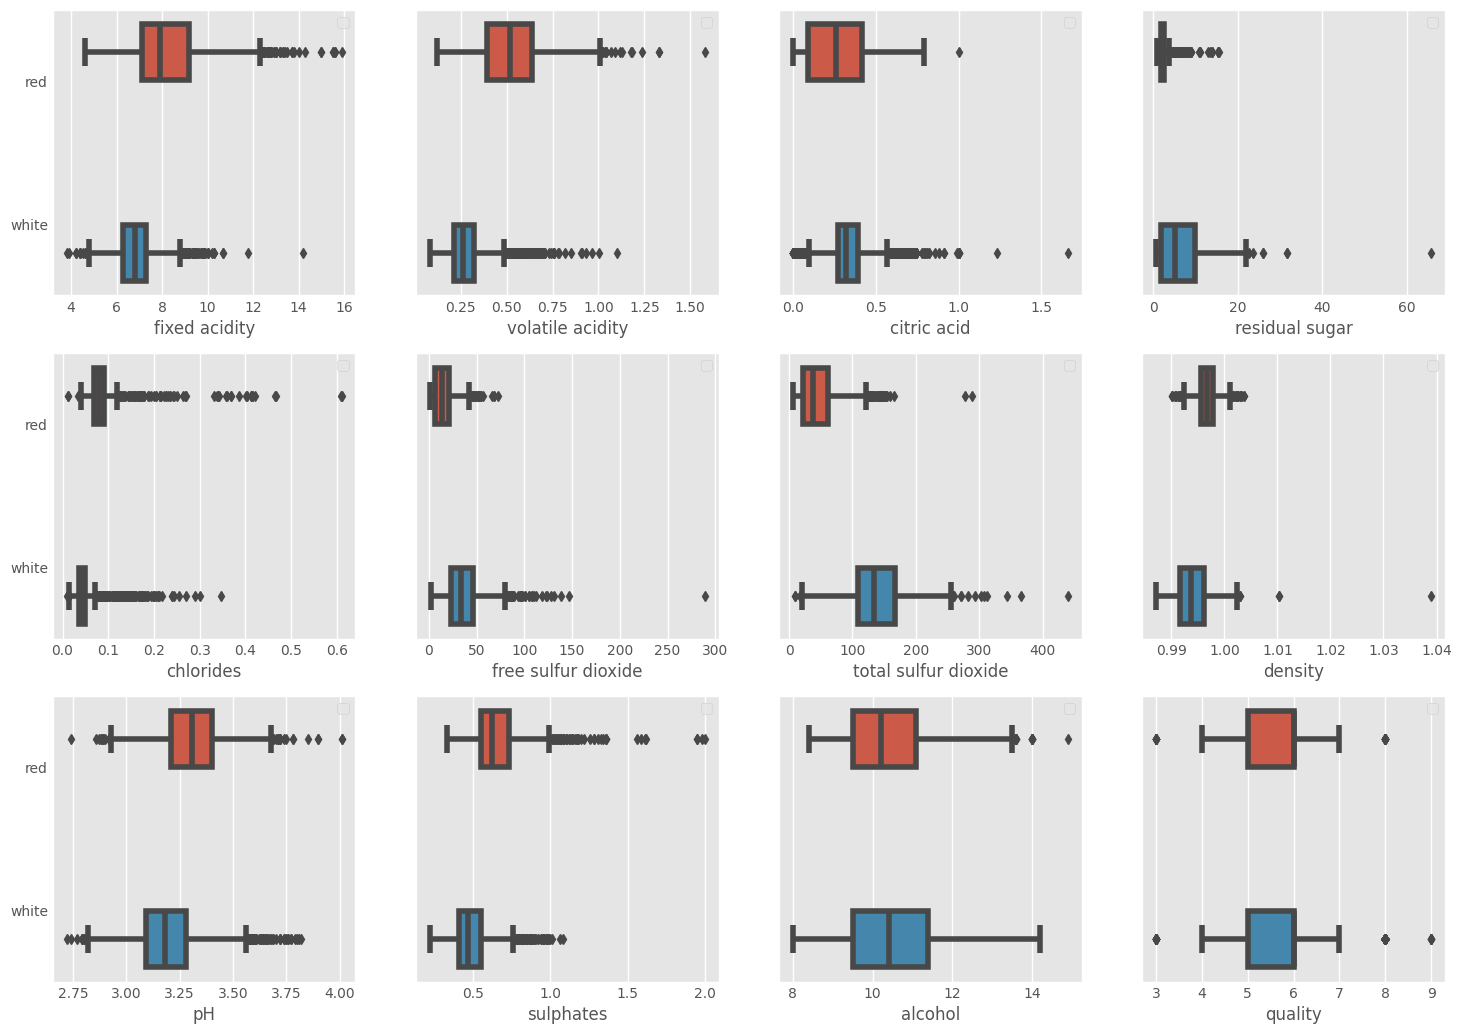

In [ ]:
matplotlib.style.use('ggplot')
features = dfPooled.columns.drop('color')

# Set up subplots with a separate axis for each feature, arranged in a 3x4 grid
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12), sharey=True)

# Iterate through each feature and create a double boxplot with hue
for i, feature in enumerate(features):
    row, col = divmod(i, 4)  # Calculate the row and column index
    sns.boxplot(x=dfPooled[feature], y=dfPooled["color"], ax=axes[row, col], hue=dfPooled["color"], dodge=True)
    axes[row, col].legend([])  # Remove the legend
    axes[row, col].set_ylabel('')  # Remove x-axis label

plt.savefig('Freq_boxplots')
# Show the plot
plt.show()

In [ ]:
dfPooled.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [ ]:
dfPooled.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


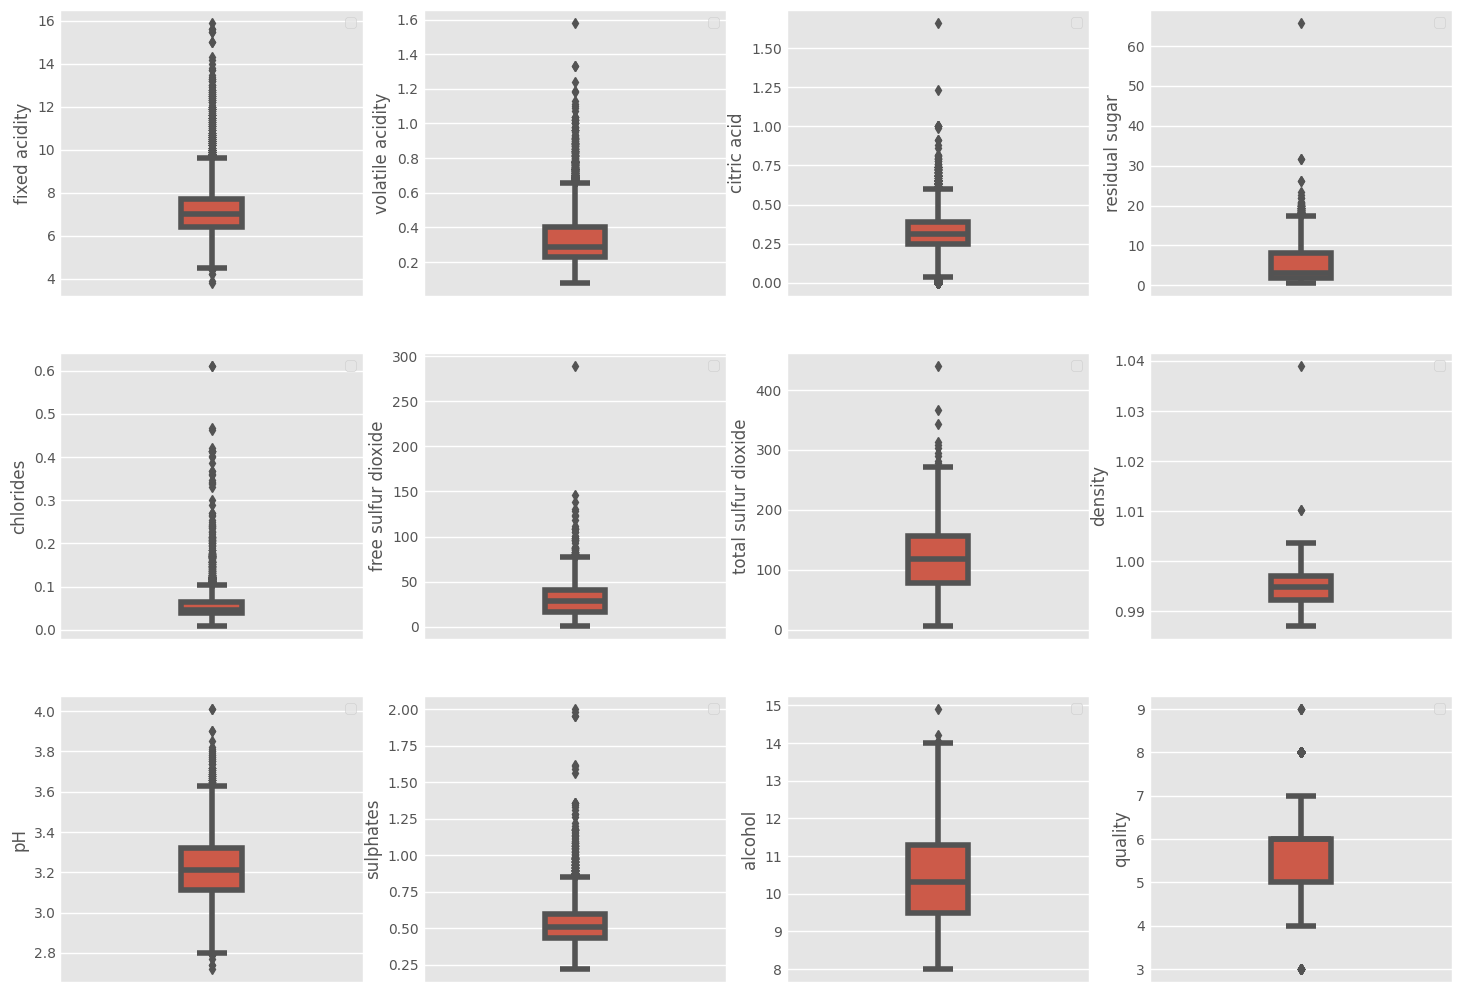

In [ ]:
features = dfPooled.columns.drop('color')

# Set up subplots with a separate axis for each feature, arranged in a 3x4 grid
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))

# Iterate through each feature and create a double boxplot with hue
for i, feature in enumerate(features):
    row, col = divmod(i, 4)  # Calculate the row and column index
    sns.boxplot(y=dfPooled[feature], ax=axes[row, col], dodge=True, width=0.2)
    axes[row, col].legend([])  # Remove the legend
    axes[row, col].set_xlabel('')  # Remove x-axis label

plt.savefig('Pooled_Freq_boxplots')
# Show the plot
plt.show()


<ipython-input-16-6456e9f11599>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dfPooled.corr()


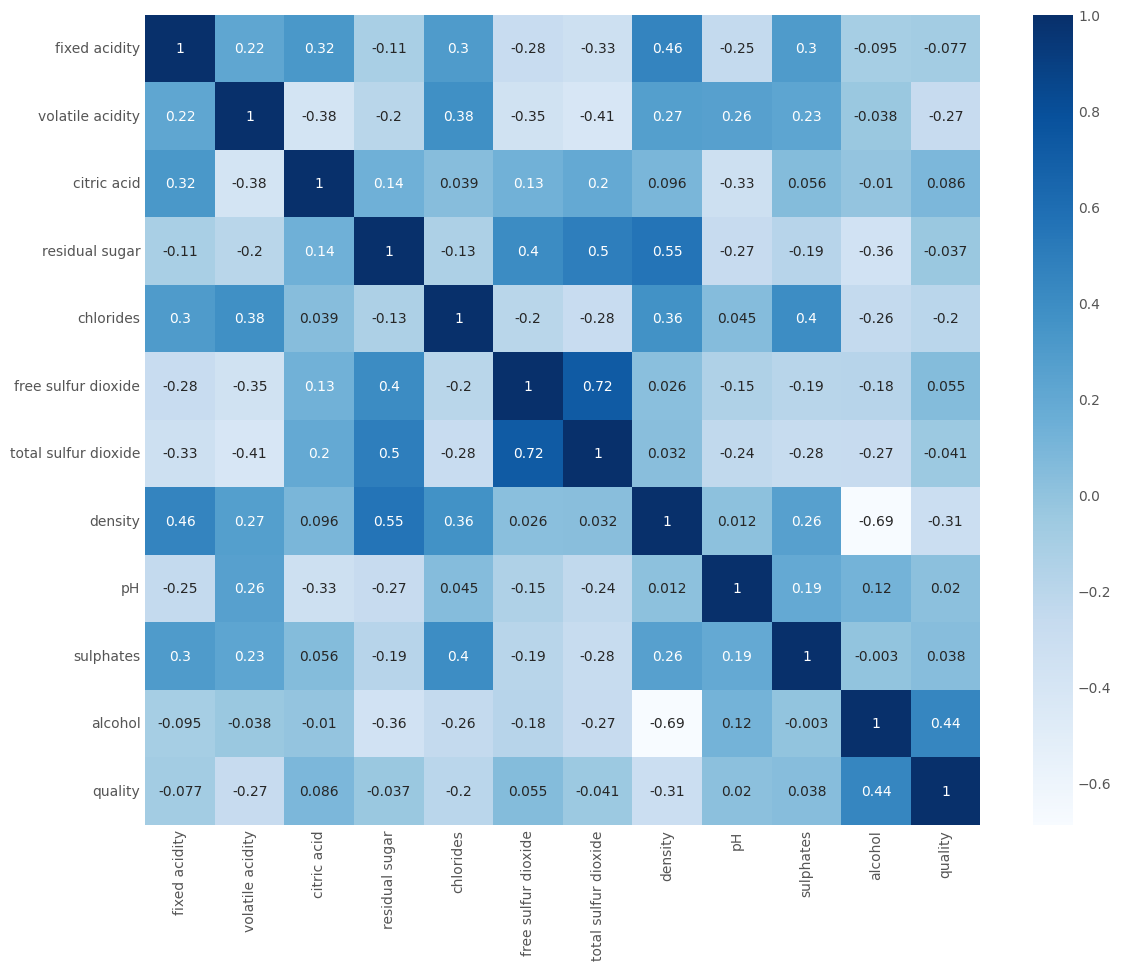

In [ ]:
corr = dfPooled.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="Blues", annot=True)
plt.savefig("MulticollinearityPlot.png", bbox_inches = "tight")
plt.show()

In [ ]:
variables = dfPooled[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','pH','sulphates','density','alcohol']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
print(vif)

           VIF              features
0    58.897405         fixed acidity
1     8.943681      volatile acidity
2     9.340251           citric acid
3     3.576148        residual sugar
4     5.575434             chlorides
5     8.452180   free sulfur dioxide
6    14.732237  total sulfur dioxide
7   589.005172                    pH
8    18.491253             sulphates
9   936.984064               density
10  107.135452               alcohol


In [ ]:
# VIF without density and total sulfur dioxide
variables = dfPooled[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','pH','sulphates','alcohol']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
print(vif)

          VIF             features
0   41.055811        fixed acidity
1    8.810711     volatile acidity
2    9.035385          citric acid
3    2.986555       residual sugar
4    5.329573            chlorides
5    5.356203  free sulfur dioxide
6  130.906138                   pH
7   18.082057            sulphates
8   87.410560              alcohol


In [ ]:
# VIF with only the variables such that all VIF values are under 10
variables = dfPooled[['volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
print(vif)

        VIF             features
0  4.070507     volatile acidity
1  4.327312          citric acid
2  2.770739       residual sugar
3  4.345042            chlorides
4  4.009511  free sulfur dioxide


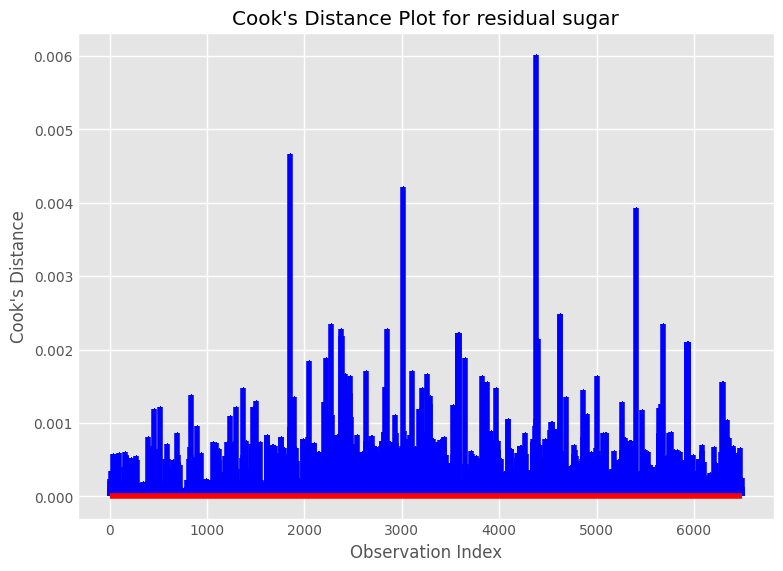

Top 5 Observations with Highest Cook's Distance for residual sugar:
Observation Index 4380: 0.006017655237675718
Observation Index 1850: 0.0046636478082166255
Observation Index 3016: 0.004219231945737503
Observation Index 5409: 0.00392674406837153
Observation Index 4628: 0.0024831449401779546




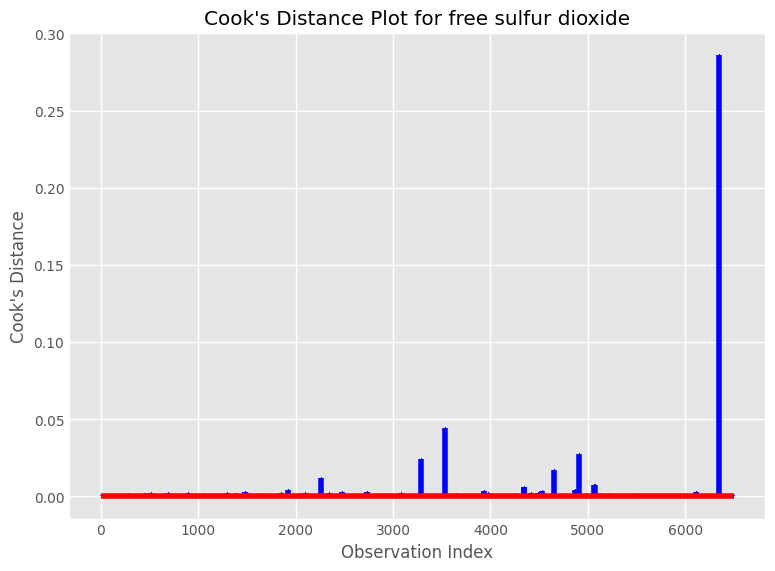

Top 5 Observations with Highest Cook's Distance for free sulfur dioxide:
Observation Index 6344: 0.2862764332868859
Observation Index 3530: 0.04405737556983483
Observation Index 4906: 0.027721449622970202
Observation Index 3287: 0.0244011565390652
Observation Index 4649: 0.01738073286507234




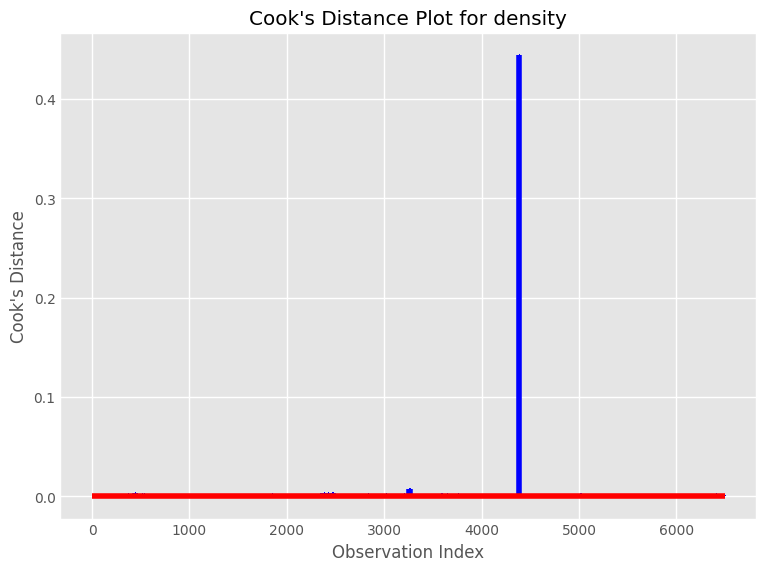

Top 5 Observations with Highest Cook's Distance for density:
Observation Index 4380: 0.44471950469110055
Observation Index 3262: 0.007785767398620489
Observation Index 3252: 0.007785767398620489
Observation Index 2382: 0.003984877403015128
Observation Index 2378: 0.003984877403015128




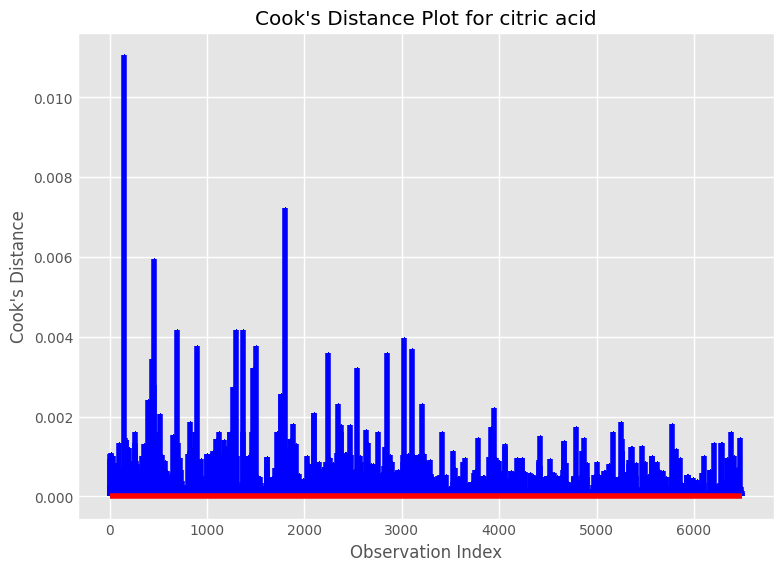

Top 5 Observations with Highest Cook's Distance for citric acid:
Observation Index 151: 0.011067155512189107
Observation Index 1806: 0.007221171363725225
Observation Index 459: 0.005951337279970984
Observation Index 690: 0.004168104498919212
Observation Index 1374: 0.004168104498919212




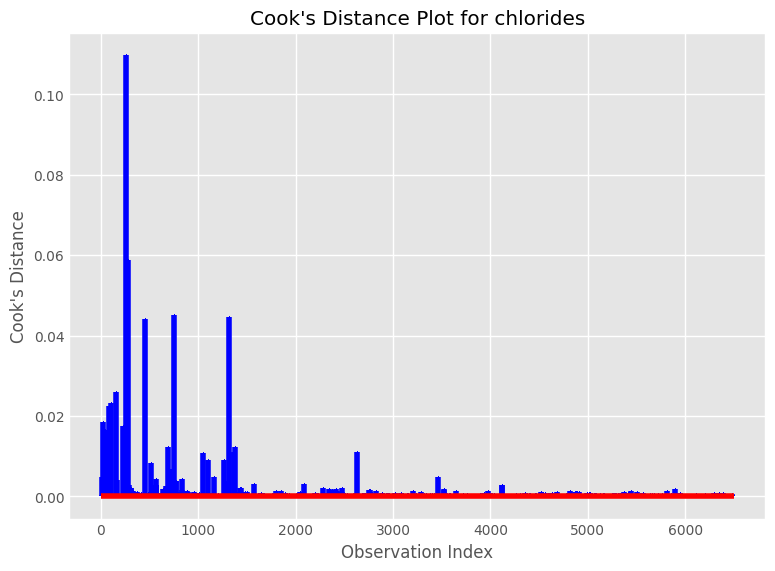

Top 5 Observations with Highest Cook's Distance for chlorides:
Observation Index 258: 0.10986568391560952
Observation Index 281: 0.05872936401292672
Observation Index 754: 0.04502238822160807
Observation Index 1319: 0.04453985305137607
Observation Index 451: 0.044061277588161564




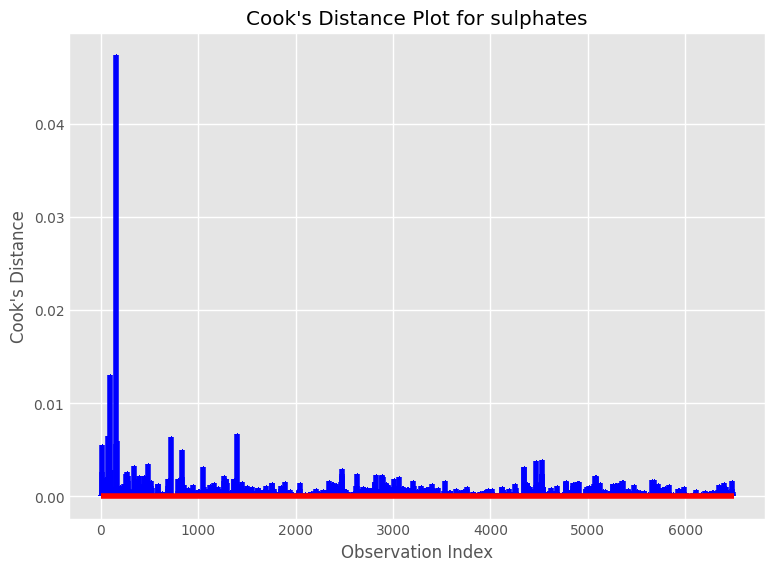

Top 5 Observations with Highest Cook's Distance for sulphates:
Observation Index 151: 0.047410126198571004
Observation Index 92: 0.013087567933340136
Observation Index 1403: 0.006681711385010016
Observation Index 79: 0.006441700318279694
Observation Index 723: 0.006348626538115454




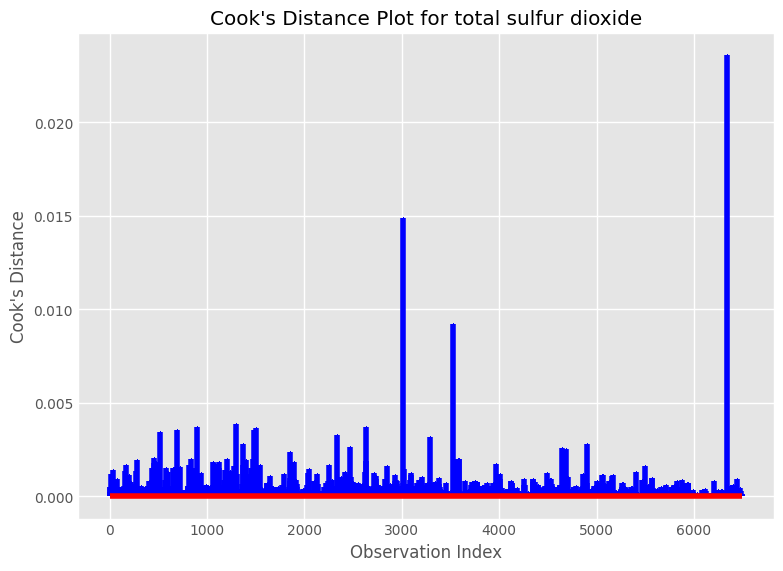

Top 5 Observations with Highest Cook's Distance for total sulfur dioxide:
Observation Index 6344: 0.023617533407537524
Observation Index 3016: 0.014866254229335784
Observation Index 3530: 0.009225694820938938
Observation Index 1299: 0.0038520689473744824
Observation Index 899: 0.0037369175101468295




In [ ]:
# Calculation of cook's distance

# Features of interest
features_of_interest = ['residual sugar', 'free sulfur dioxide', 'density', 'citric acid', 'chlorides', 'sulphates', 'total sulfur dioxide']

# Calculate Cook's distance for each feature
for feature in features_of_interest:
    # Prepare the data
    X = dfPooled[[feature]]
    y = dfPooled['quality']

    # Add a constant term for intercept
    X = sm.add_constant(X)

    # Fit the ordinary least squares (OLS) model
    model = sm.OLS(y, X).fit()

    # Calculate Cook's distance
    infl = model.get_influence()
    cooks_distance = infl.cooks_distance[0]

    # Plot Cook's distance
    plt.figure(figsize=(8, 6))
    plt.stem(cooks_distance, markerfmt=",", linefmt="b-", basefmt="r-")
    plt.title(f"Cook's Distance Plot for {feature}")
    plt.xlabel("Observation Index")
    plt.ylabel("Cook's Distance")
    plt.show()

    # Get the top 5 observations with highest Cook's distance
    top_5_indices = cooks_distance.argsort()[-5:][::-1]
    top_5_cooks_distance = cooks_distance[top_5_indices]

    # Print Cook's distance for the top 5 observations
    print(f"Top 5 Observations with Highest Cook's Distance for {feature}:")
    for i, index in enumerate(top_5_indices):
        print(f"Observation Index {index}: {top_5_cooks_distance[i]}")
    print("\n")

In [ ]:
# Function to print observations with Cook's distance above 0.15
def print_high_cooks_distance_indices(cooks_distance, threshold, feature):
    high_cooks_distance_indices = [i for i, value in enumerate(cooks_distance) if value > threshold]
    if high_cooks_distance_indices:
        print(f"Observations with Cook's Distance above {threshold} for {feature}:")
        for index in high_cooks_distance_indices:
            print(f"Indice with {feature} with high Cook's distance: {index}")
            print(dfPooled.iloc[index])
            print("\n")

# Set the threshold for Cook's distance
threshold = 0.15

# Check and print observations with Cook's distance above the threshold for each feature
for feature in features_of_interest:
    X = dfPooled[[feature]]
    X = sm.add_constant(X)

    cooks_distance = sm.OLS(y, X).fit().get_influence().cooks_distance[0]
    print_high_cooks_distance_indices(cooks_distance, threshold, feature)

Observations with Cook's Distance above 0.15 for free sulfur dioxide:
Indice with free sulfur dioxide with high Cook's distance: 6344
fixed acidity               6.1
volatile acidity           0.26
citric acid                0.25
residual sugar              2.9
chlorides                 0.047
free sulfur dioxide       289.0
total sulfur dioxide      440.0
density                 0.99314
pH                         3.44
sulphates                  0.64
alcohol                    10.5
quality                       3
color                     white
Name: 6344, dtype: object


Observations with Cook's Distance above 0.15 for density:
Indice with density with high Cook's distance: 4380
fixed acidity               7.8
volatile acidity          0.965
citric acid                 0.6
residual sugar             65.8
chlorides                 0.074
free sulfur dioxide         8.0
total sulfur dioxide      160.0
density                 1.03898
pH                         3.39
sulphates               

In [ ]:
# Drop outliers with high cook's distance
indices_to_drop = [6344, 4380]
dfPooled = dfPooled.drop(indices_to_drop)

In [ ]:
dfPooledDummy = pd.get_dummies(dfPooled, columns=['color'], drop_first=True)
dfPooledDummy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [ ]:
# Creation of Interaction Variables

# Use dummy variable for color
dfPooledDummy = pd.get_dummies(dfPooled, columns=['color'], drop_first=True)

features_for_interaction = ['fixed acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'pH', 'sulphates']

# Create interaction variables and put them in a new DataFrame dfInter
dfInter = dfPooledDummy

for feature in features_for_interaction:
    # Create interaction variable
    interaction_var = dfPooledDummy[feature] * dfPooledDummy['color_white']

    # Add interaction variable to dfInter
    dfInter[f'{feature}_x_color_white'] = interaction_var

# Display the new DataFrame dfInter
dfInter.tail()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color_white,fixed acidity_x_color_white,citric acid_x_color_white,residual sugar_x_color_white,chlorides_x_color_white,free sulfur dioxide_x_color_white,pH_x_color_white,sulphates_x_color_white
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1,6.2,0.29,1.6,0.039,24.0,3.27,0.50
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1,6.6,0.36,8.0,0.047,57.0,3.15,0.46
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1,6.5,0.19,1.2,0.041,30.0,2.99,0.46
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1,5.5,0.30,1.1,0.022,20.0,3.34,0.38
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,1,6.0,0.38,0.8,0.020,22.0,3.26,0.32


In [ ]:
predictor_columns = dfInter.columns[dfInter.columns != 'quality']

# Loop through predictor columns
for predictor in predictor_columns:
    # Extract predictor and response variables
    X = dfInter[predictor]
    y = dfInter['quality']

    # Add a constant term to the predictor for the intercept
    X = sm.add_constant(X)

    # Fit OLS model
    res = sm.OLS(y, X).fit()



    # Prediction
    print(predictor)
    ols_preds = res.predict()

    # Plot the regression line
#    sns.scatterplot(x=X[predictor], y=y)
#    sns.lineplot(x=X[predictor], y=ols_preds, color='red')
#    plt.title(f'Regression Line for {predictor} vs. Quality')
#    plt.xlabel(predictor)
#    plt.ylabel('Quality')
#    plt.show()

    # Model summary
    print(res.summary())

fixed acidity
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     38.98
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           4.55e-10
Time:                        04:58:36   Log-Likelihood:                -8311.6
No. Observations:                6495   AIC:                         1.663e+04
Df Residuals:                    6493   BIC:                         1.664e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.1940      0.

In [ ]:
# Testing and training set

X = dfInter.drop('quality', axis=1)  # Features (predictors)
y = dfInter['quality']  # Response variable

X_train_inter, X_test_inter, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Performance Metrics
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

In [ ]:
# Diagnostic Plot
def diagnostic_plots(model, X, y, model_name):
    residuals = model.resid
    fitted_values = model.fittedvalues
    stand_resids = model.resid_pearson
    influence = model.get_influence()
    leverage = influence.hat_matrix_diag

    #Diagnostic Plot style
    plt.rcParams["figure.figsize"] = (20,15)
    fig, ax = plt.subplots(nrows=2, ncols=2)
    plt.style.use('seaborn-v0_8')

    # Residuals vs Fitted Plot
    sns.scatterplot(x=fitted_values, y=residuals, ax=ax[0, 0])
    ax[0, 0].axhline(y=0, color='grey', linestyle='dashed')
    ax[0, 0].set_xlabel('Fitted Values')
    ax[0, 0].set_ylabel('Residuals')
    ax[0, 0].set_title(f'{model_name} - Residuals vs Fitted')

    # Normal Q-Q Plot
    sm.qqplot(residuals, fit=True, line='45', ax=ax[0, 1])
    ax[0, 1].set_title(f'{model_name} - Normal Q-Q')

    # Scale-Location Plot
    sns.regplot(x=fitted_values, y=np.sqrt(np.abs(stand_resids)),
            scatter=True, ci=False, lowess=True, line_kws={'color':'red','lw':1,'alpha':0.8}, ax=ax[1, 0])
    ax[1, 0].axhline(y=0, color='grey', linestyle='dashed')
    ax[1, 0].set_xlabel('Fitted values')
    ax[1, 0].set_ylabel('Sqrt(standardized residuals)')
    ax[1, 0].set_title(f'{model_name} - Scale-Location Plot')

    # Residuals vs Leverage Plot
    sns.regplot(x=leverage, y=stand_resids,
            scatter=True, ci=False, lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=ax[1, 1])
    ax[1, 1].axhline(y=0, color='grey', linestyle='dashed')
    ax[1, 1].set_xlabel('Leverage')
    ax[1, 1].set_ylabel('Standardized residuals)')
    ax[1, 1].set_title(f'{model_name} - Residuals vs Leverage')
        # Get x-axis and y-axis limits
    x_limits = ax[1, 1].get_xlim()
    y_limits = ax[1, 1].get_ylim()
    ax[1, 1].set_xlim(x_limits)
    ax[1, 1].set_ylim(y_limits)


    # Add Cook's distance contours
    p = len(model.params)
    def cook_formula(x):
        return np.sqrt((0.5 * p * (1 - x)) / x)
    def one_formula(x):
        return np.sqrt((1 * p * (1 - x)) / x)
    x_range = np.linspace(0.001, 0.200, 50)
    # 0.5 line
    ax[1, 1].plot(x_range, cook_formula(x_range), label="Cook's distance (0.5)", lw=1, ls='--', color='red')
    # 1 line
    ax[1, 1].plot(x_range, one_formula(x_range), label="Cook's distance (1)", lw=1, ls='--', color='red')
    # Set axes
    ax[1, 1].legend(loc='upper right')

    plt.tight_layout()
    plt.savefig(f'{model_name} Diag Plots.png')
    plt.show()

In [ ]:
dfInter.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color_white,fixed acidity_x_color_white,citric acid_x_color_white,residual sugar_x_color_white,chlorides_x_color_white,free sulfur dioxide_x_color_white,pH_x_color_white,sulphates_x_color_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Model without interaction variables
selected_variables = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']

# Create a new DataFrame with only the selected variables
X_train_full = X_train_inter[selected_variables]
X_test_full = X_test_inter[selected_variables]

Full model:
 const                   66.729857
fixed acidity            0.083345
volatile acidity        -1.338918
citric acid             -0.117796
residual sugar           0.049090
chlorides               -0.018574
free sulfur dioxide      0.006319
total sulfur dioxide    -0.002553
density                -66.315639
pH                       0.477274
sulphates                0.777581
alcohol                  0.269925
dtype: float64 
                             OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     202.5
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        07:49:05   Log-Likelihood:                -5784.9
No. Observations:                5196   AIC:                         1.159e+04
Df Residu

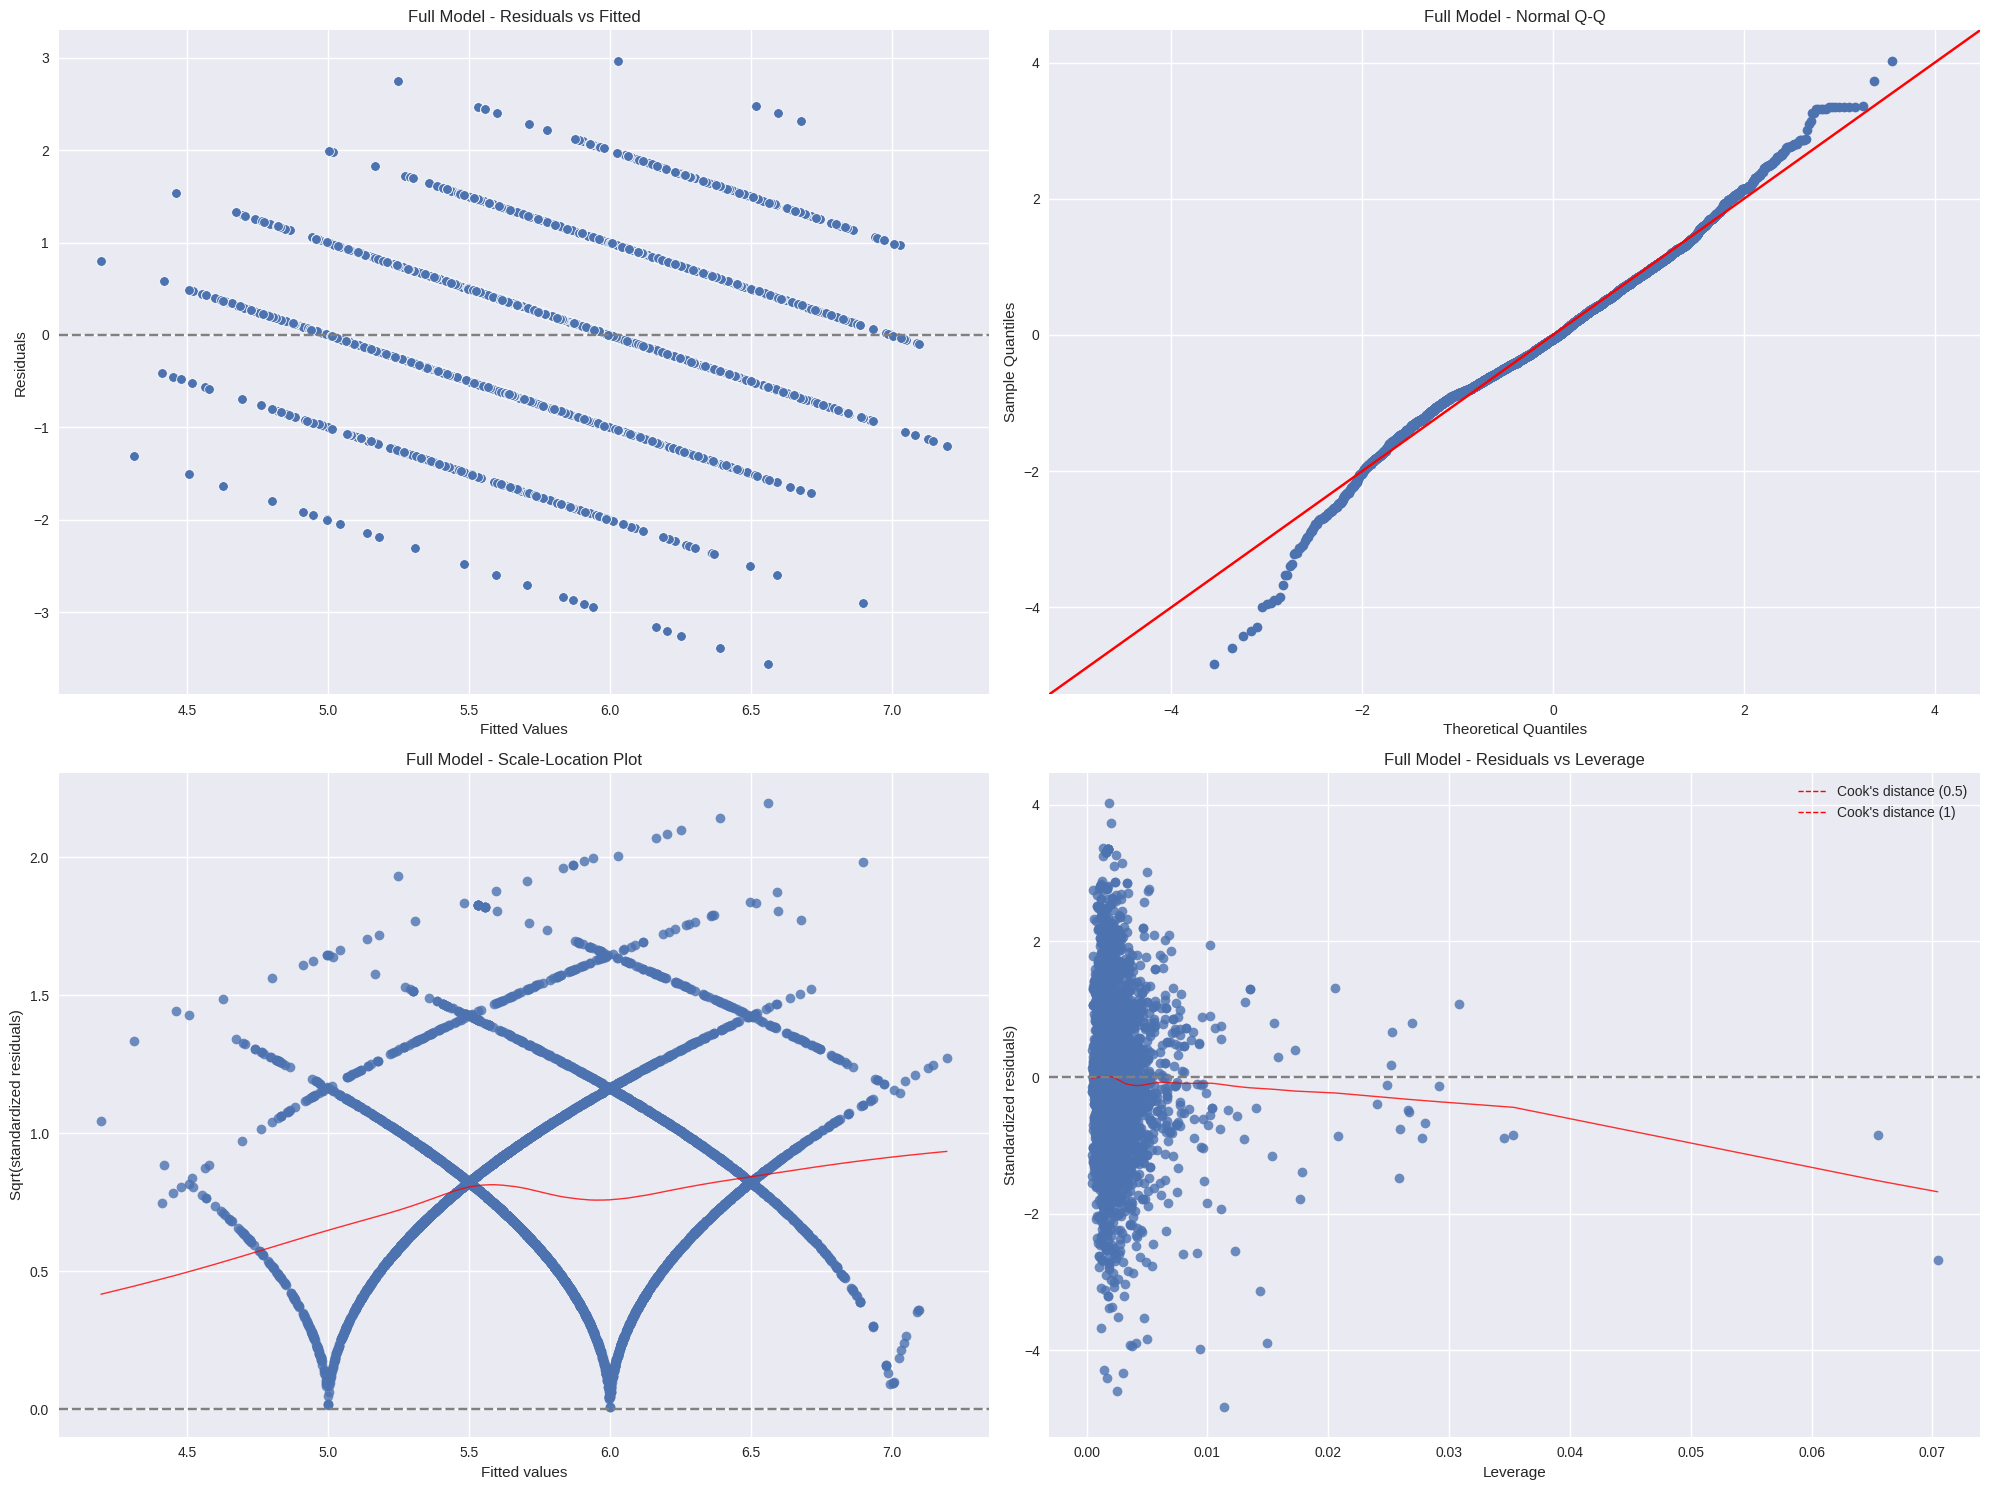

In [ ]:
# Fit the Full model
full_model = sm.OLS(y_train, sm.add_constant(X_train_full)).fit()
y_pred_full = full_model.predict(sm.add_constant(X_test_full))
print("Full model:\n",full_model.params,"\n",full_model.summary())

# Evaluate Metrics
metrics_full = calculate_metrics(y_test, y_pred_full)
print('\nMetrics for Full Model on Validation Data:')
print(f'MAE: {metrics_full[0]}, MSE: {metrics_full[1]}, RMSE: {metrics_full[2]}, R^2: {metrics_full[3]}')

# Generate Diagnostic Plots
print('\nDiag plots for Full Mode:')
diagnostic_plots(full_model, X_train_full, y_train, "Full Model")


Full Model with Color Dummy Variable:
 const                                137.857122
fixed acidity                          0.163447
volatile acidity                      -1.589390
citric acid                           -0.641162
residual sugar                         0.071783
chlorides                             -0.505223
free sulfur dioxide                   -0.001869
total sulfur dioxide                  -0.000833
density                             -136.704604
pH                                     0.256502
sulphates                              0.901500
alcohol                                0.209140
color_white                           -1.166471
fixed acidity_x_color_white           -0.097796
citric acid_x_color_white              0.707451
residual sugar_x_color_white           0.003175
chlorides_x_color_white                0.427690
free sulfur dioxide_x_color_white      0.007082
pH_x_color_white                       0.365733
sulphates_x_color_white               -0.247919


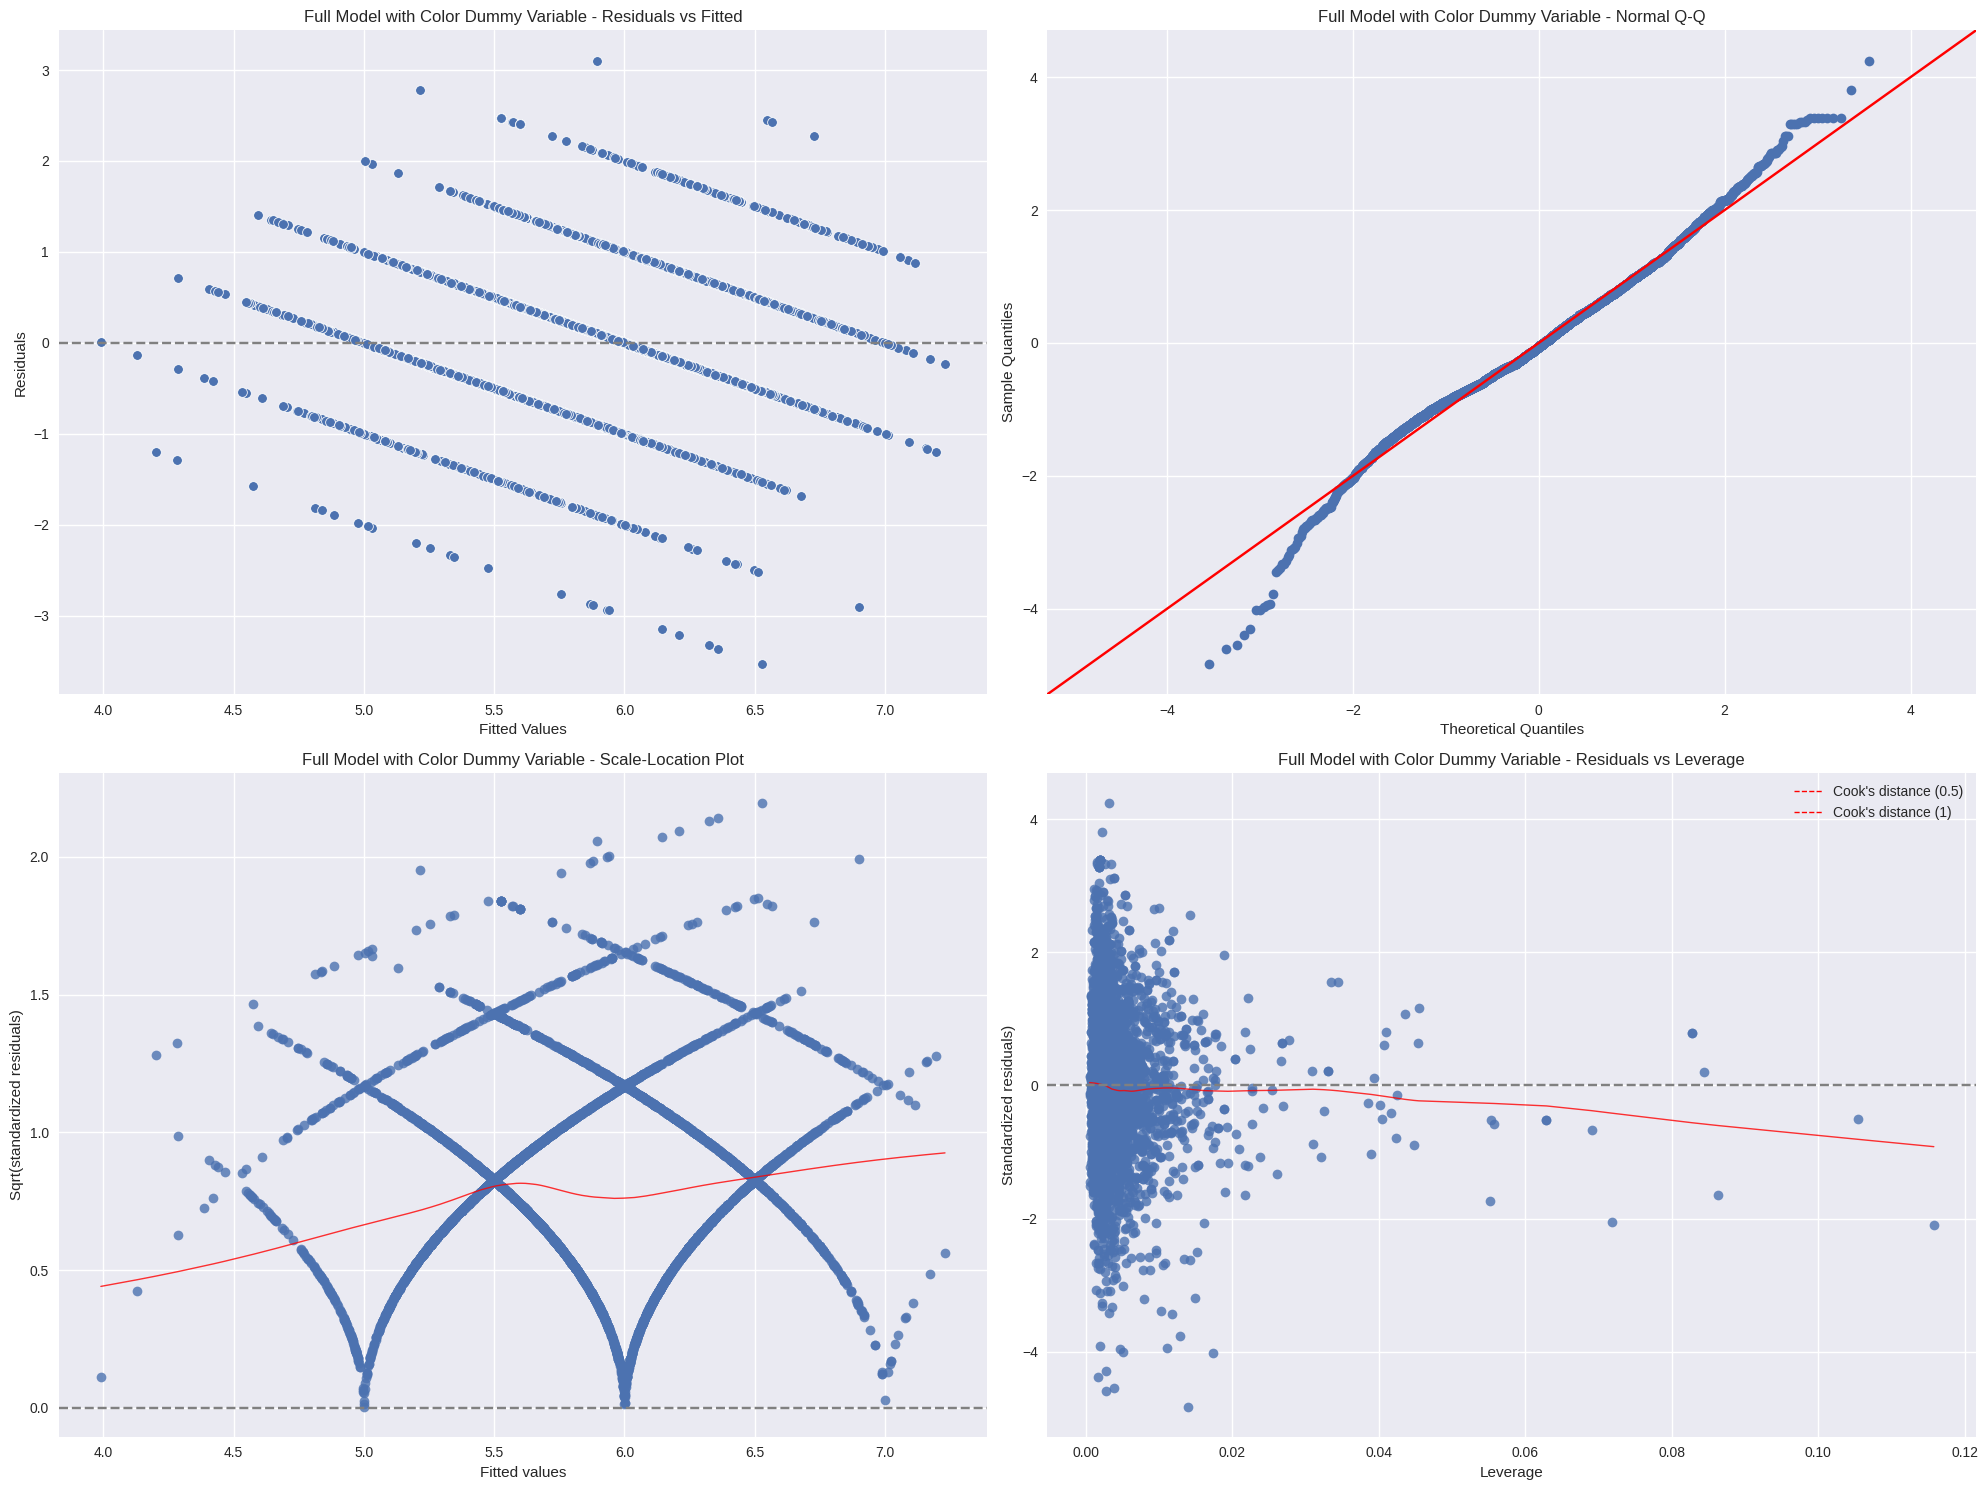

In [ ]:
# Fit the model with color dummy variable
inter_model = sm.OLS(y_train, sm.add_constant(X_train_inter)).fit()
y_pred_inter = inter_model.predict(sm.add_constant(X_test_inter))

print("\nFull Model with Color Dummy Variable:\n",inter_model.params,"\n",inter_model.summary())

# Model metrics
metrics_inter = calculate_metrics(y_test, y_pred_inter)

print('\nMetrics for Full Model with Color Dummy Variable Model on Validation Data:')
print(f'MAE: {metrics_inter[0]}, MSE: {metrics_inter[1]}, RMSE: {metrics_inter[2]}, R^2: {metrics_inter[3]}')

# Model diagnostic plots
print('\nDiag plots for Full Model with Color Dummy Variable:')
diagnostic_plots(inter_model, X_train_inter, y_train, "Full Model with Color Dummy Variable")

In [ ]:
# Variable Selection for Reduced Model (Backwards Selection)
def reducemodel(fullmodeltrain, fullmodeltest, removed_variables):
    # Create reduced datasets
    global X_train_reduced
    X_train_reduced = fullmodeltrain.drop(columns=removed_variables)
    global X_test_reduced
    X_test_reduced = fullmodeltest.drop(columns=removed_variables)

    # Fit OLS model
    global reduced_model
    reduced_model = sm.OLS(y_train, sm.add_constant(X_train_reduced)).fit()

    # Make prediction
    global y_pred_reduced
    y_pred_reduced = reduced_model.predict(sm.add_constant(X_test_reduced))
    global metrics_reduced
    metrics_reduced = calculate_metrics(y_test, y_pred_reduced)

    # Generate summary statistics
    summary = reduced_model.summary()
    print(summary)

    return reduced_model

In [ ]:
# Play with removed variables to achieve a model for further testing
removed_variables=['residual sugar_x_color_white','chlorides_x_color_white','free sulfur dioxide',
                   'chlorides','color_white','sulphates_x_color_white','pH_x_color_white']

reducemodel(X_train_inter,X_test_inter,removed_variables)


['residual sugar_x_color_white', 'chlorides_x_color_white', 'free sulfur dioxide', 'chlorides', 'color_white', 'sulphates_x_color_white', 'pH_x_color_white']
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     195.6
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        07:54:43   Log-Likelihood:                -5743.0
No. Observations:                5196   AIC:                         1.151e+04
Df Residuals:                    5183   BIC:                         1.160e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                        coef    std 


Reduced model:
 const                                144.765839
fixed acidity                          0.178188
volatile acidity                      -1.615482
citric acid                           -0.570687
residual sugar                         0.077531
total sulfur dioxide                  -0.000865
density                             -144.739027
pH                                     0.582258
sulphates                              0.745764
alcohol                                0.200675
fixed acidity_x_color_white           -0.102242
citric acid_x_color_white              0.628287
free sulfur dioxide_x_color_white      0.005372
dtype: float64

Metrics for Reduced Model on Validation Data:
MAE: 0.5573902441079949, MSE: 0.5130425838410039, RMSE: 0.7162699099089699, R^2: 0.2709847133012657

Diag plots for Reduced Model:


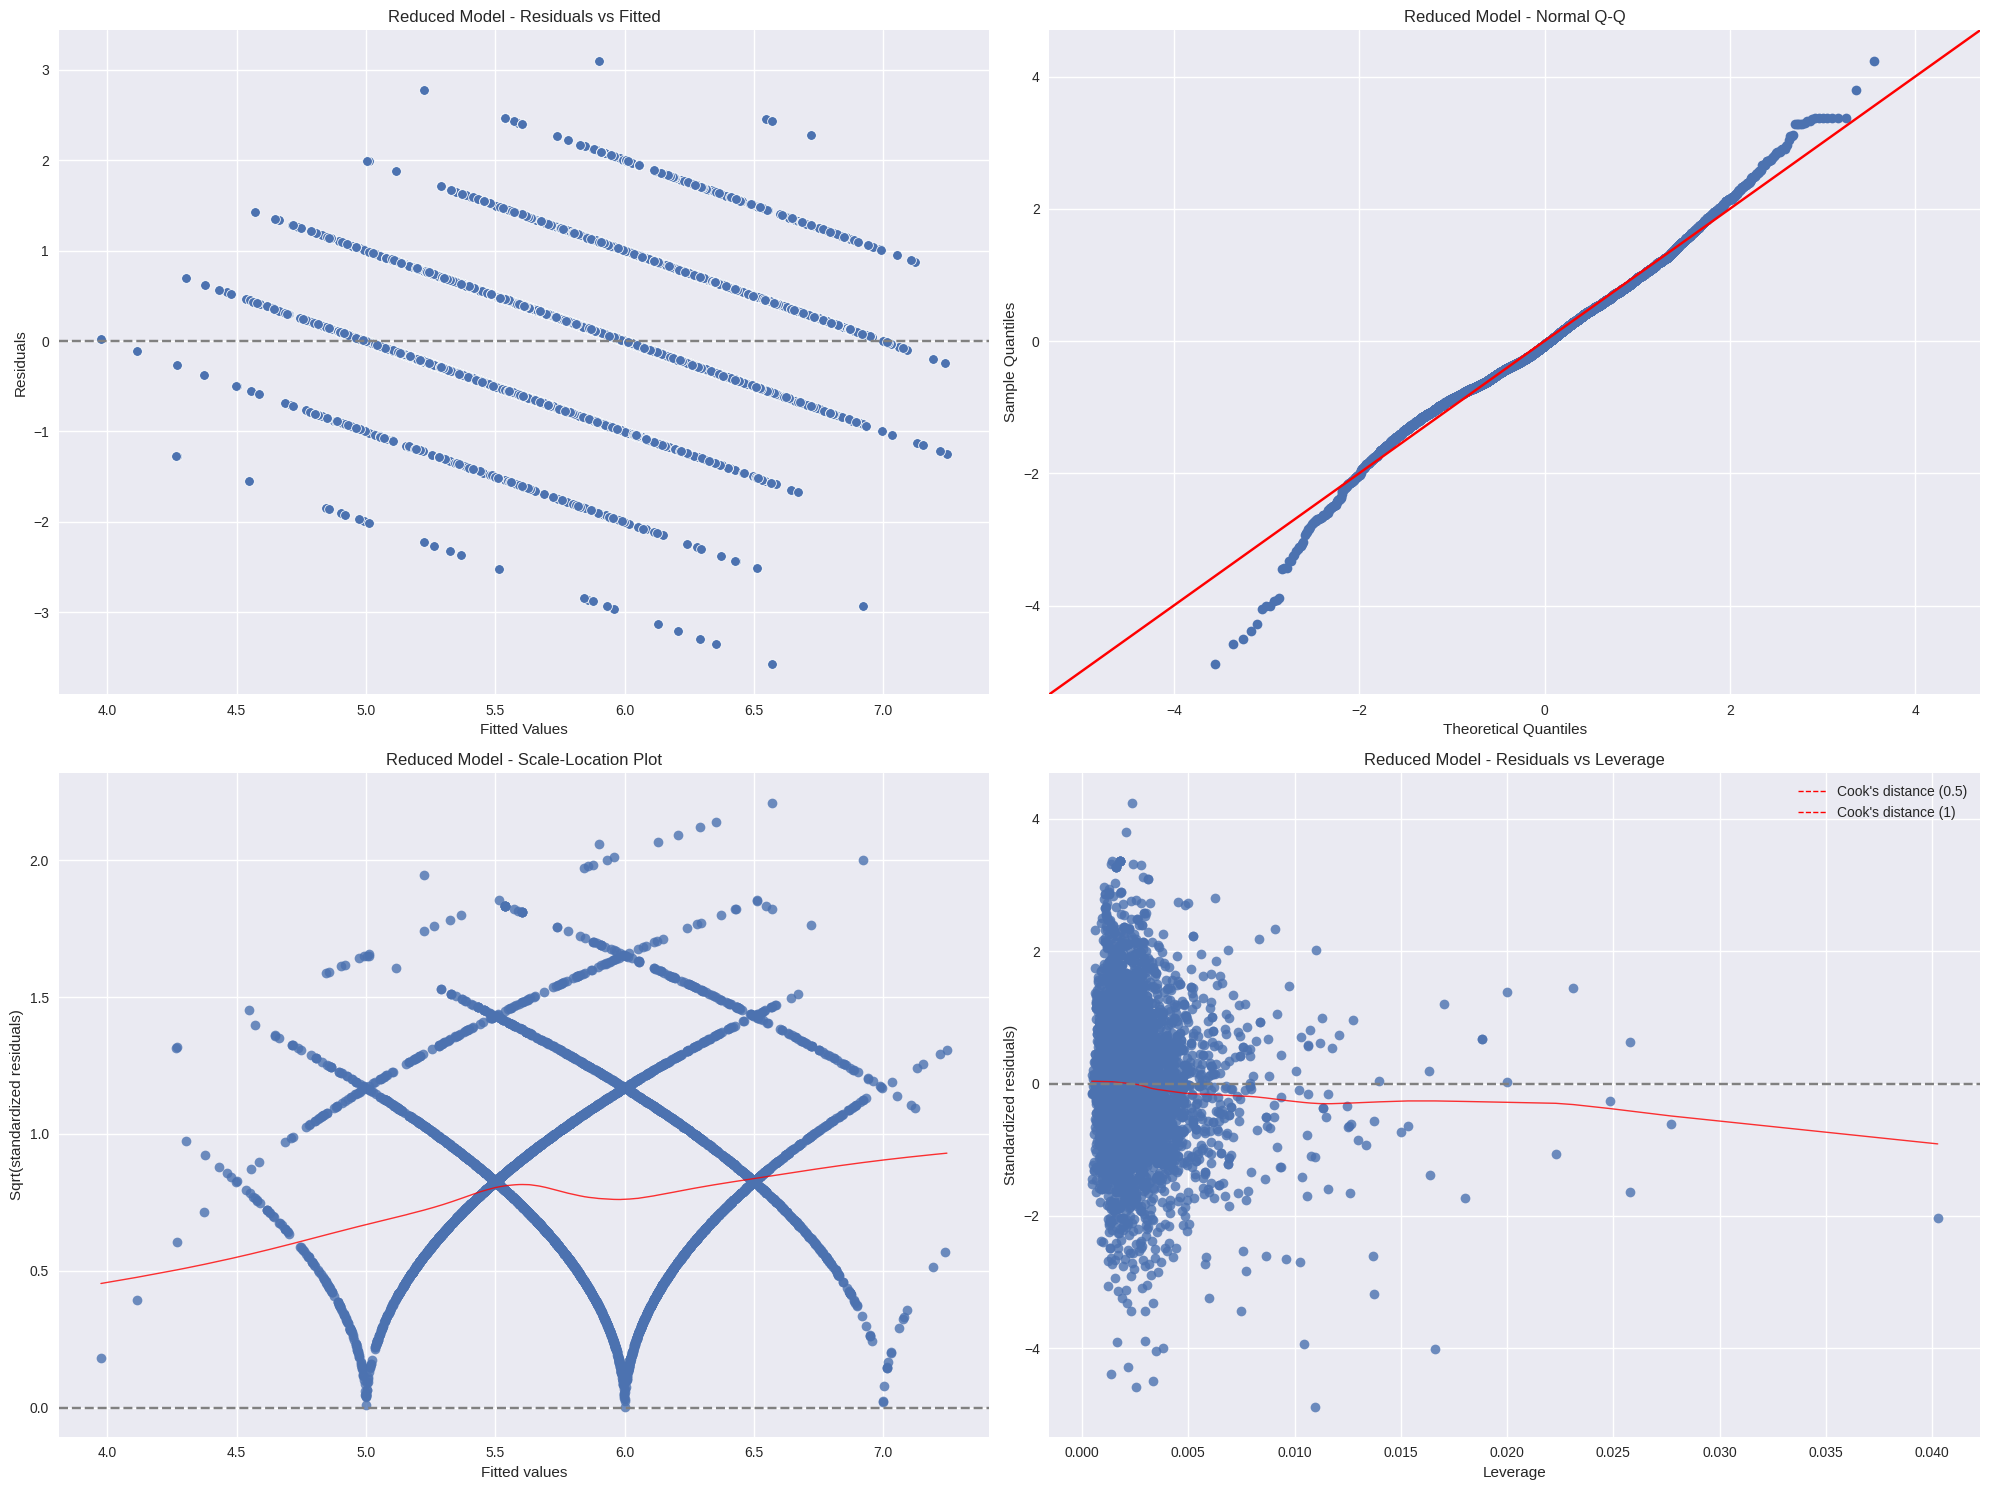

In [ ]:
# Now we may print the reduced model and assess it's diagnostic plots and metrics on the validation data
print("\nReduced model:\n",reduced_model.params)

print('\nMetrics for Reduced Model on Validation Data:')
print(f'MAE: {metrics_reduced[0]}, MSE: {metrics_reduced[1]}, RMSE: {metrics_reduced[2]}, R^2: {metrics_reduced[3]}')

# Model diagnostic plots
print('\nDiag plots for Reduced Model:')
diagnostic_plots(reduced_model, X_train_reduced, y_train, "Reduced Model")

In [ ]:
# Random Forest Model
rf_model = RandomForestRegressor()
rf_model.fit(X_train_full, y_train)

# RF Predictions
y_pred_rf = rf_model.predict(X_test_full)

Feature Importances

fixed acidity         : 0.057152963811603306
volatile acidity      : 0.12716188944405415
citric acid           : 0.05876863847756564
residual sugar        : 0.06765257288826944
chlorides             : 0.06395639206028873
free sulfur dioxide   : 0.08819934897631937
total sulfur dioxide  : 0.07298442277728415
density               : 0.06114265163116129
pH                    : 0.06592952711372307
sulphates             : 0.0773147412652579
alcohol               : 0.259736851554473

Metrics for Random Forest Model on Test Data:
MAE: 0.42271747498075446, MSE: 0.3377224788298691, RMSE: 0.5811389496754361, R^2: 0.5201083545823846 



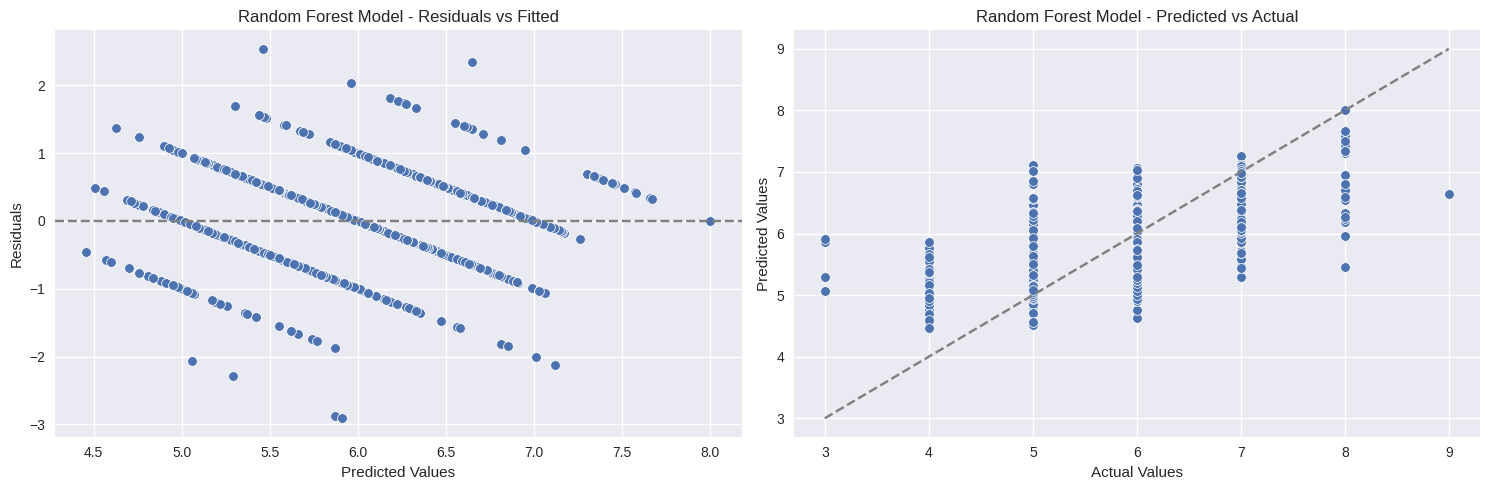

In [ ]:
# Accessing feature importances
print("Feature Importances\n")
for feature_name, importance in zip(X_train_full, rf_model.feature_importances_):
    print(f"{feature_name.ljust(22)}: {importance}")

# Random forest model diagnostics
metrics_rf = calculate_metrics(y_test, y_pred_rf)

print('\nMetrics for Random Forest Model on Test Data:')
print(f'MAE: {metrics_rf[0]}, MSE: {metrics_rf[1]}, RMSE: {metrics_rf[2]}, R^2: {metrics_rf[3]}',"\n")

# Model analysis for random forest
y_pred = y_pred_rf

# Residuals vs Fitted Plot
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred, y=y_test - y_pred)
plt.axhline(y=0, color='grey', linestyle='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Random Forest Model - Residuals vs Fitted')

# Predicted vs Actual Plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='grey')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Model - Predicted vs Actual')

plt.tight_layout()
plt.savefig('Random Forest Plots.png')
plt.show()